In [1]:
#evn: python3

import pandas as pd
import datetime
import random
import numpy as np
from matplotlib import pyplot

## Calculating the Delivery Frequency of each vessel

### Loading the delivery details

In [2]:
deliveries = pd.read_csv("/data/Linde_Intel_AI_Challenge_Nov2018/deliveries.csv", header=0, parse_dates=["DELIVERY_DATE"],  squeeze=True)

### Making a list of all vessel IDs

In [3]:
groups = deliveries.groupby('VESSEL_ID')
vessel_ids = list(groups.groups.keys())  #list of all vessel id

### Finding the delivery Frequncy for each vessel id

In [5]:
new_list = list()
for i, vessel_id in enumerate(vessel_ids):
    #vessel_id = random.choice(vessel_ids)
    a = deliveries[deliveries['VESSEL_ID'] == vessel_id].sort_values(by=['DELIVERY_DATE'])
    a.drop(['VESSEL_ID'], axis=1, inplace=True)
    li = a['DELIVERY_DATE'].tolist()
    if len(li) > 1:
        li_copy = li.copy()
        li_copy.remove(li_copy[0])
        li_copy.append(li_copy[-1])
        diff = [ b_i - a_i for a_i, b_i in zip(li,li_copy)]
        diff.remove(diff[-1])
        average_timedelta = sum(diff, datetime.timedelta(0)) / len(diff)
        days = average_timedelta.days
    else:
        days = 600
        
    new_list.append([vessel_id, days])
    
    #print("%d/%d %s  %d " %(i, len(vessel_ids), vessel_id, days))

### Converting the generated list as a dataframe and saving them

In [71]:
new_df = pd.DataFrame(new_list, columns=['VESSEL_ID', 'DELIVERY_FREQUENCY'])
new_df.to_csv('del_freq.csv')

## Visualzing the vessels in the cluster

In [6]:
feq = pd.read_csv('del_freq.csv', index_col=0)
feq_lis = list (feq.groupby('DELIVERY_FREQUENCY').groups.keys())
feq_dict  = {i : feq[feq['DELIVERY_FREQUENCY'] == i].VESSEL_ID.tolist() for i in feq_lis}

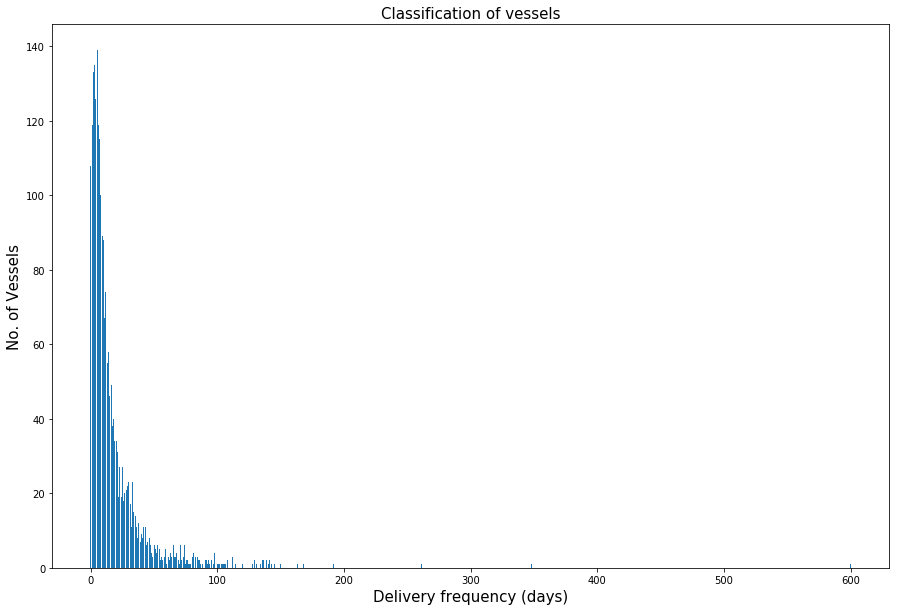

In [7]:
la = []
lb = []
for d, i in feq_dict.items():
    la.append(d)
    lb.append(len(i))

pyplot.figure(figsize=(15,10))
pyplot.bar(la, lb)
pyplot.xlabel('Delivery frequency (days)', fontsize=15)
pyplot.ylabel('No. of Vessels', fontsize=15)
pyplot.title("Classification of vessels", fontsize=15)
pyplot.show()

### Next step:

For each delivery frequency value, model will be trained. 